# DATA CLEANING

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)
pd.options.mode.use_inf_as_na = True
from matplotlib.projections import register_projection
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
fdata = pd.read_csv('nycflights.csv', index_col=0)
display(fdata.head())
display(fdata.info())
display(fdata.sample(5))
# dep_time: departure time
# arr_time: thời gian đến
# tailnum: số hiệu máy bay
# flightL số chuyến bay
# origin: sân bay khởi hành
# dest: sân bay đến
# air_time: thời gian trên không

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 1 to 336776
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_time   328521 non-null  float64
 4   dep_delay  328521 non-null  float64
 5   arr_time   328063 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    336776 non-null  object 
 8   tailnum    334264 non-null  object 
 9   flight     336776 non-null  int64  
 10  origin     336776 non-null  object 
 11  dest       336776 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   336776 non-null  int64  
 14  hour       328521 non-null  float64
 15  minute     328521 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 43.7+ MB


None

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
138038,2013,3,3,703.0,3.0,941.0,-13.0,UA,N37298,1592,EWR,MCO,138.0,937,7.0,3.0
228521,2013,6,7,1924.0,5.0,2207.0,-3.0,UA,N73270,1259,LGA,IAH,196.0,1416,19.0,24.0
265935,2013,7,17,1455.0,0.0,1653.0,-22.0,DL,N347NB,127,JFK,DTW,78.0,509,14.0,55.0
32406,2013,10,6,1927.0,-3.0,2036.0,-20.0,EV,N16561,4224,EWR,MKE,105.0,725,19.0,27.0
12008,2013,1,14,1755.0,-5.0,1959.0,-7.0,US,N654AW,373,JFK,CLT,90.0,541,17.0,55.0


In [3]:
# tạo ra 1 dataframe để thực hiện phân tích và làm sạch dữ liệu (tập dữ liệu gốc sử dụng backup cho quá trình phân tích)
df = fdata.copy()

In [4]:
for i in ['carrier', 'tailnum', 'origin', 'dest']:
    display(df[i].value_counts())
    print(f'Số dữ liệu duy nhất cột {i} là: {df[i].nunique()}')
    print(f'Số dòng cột {i} là: {df[i].shape}')

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

Số dữ liệu duy nhất cột carrier là: 16
Số dòng cột carrier là: (336776,)


N725MQ    575
N722MQ    513
N723MQ    507
N711MQ    486
N713MQ    483
         ... 
N7ASAA      1
N932DN      1
N318AS      1
N651UA      1
N557AS      1
Name: tailnum, Length: 4043, dtype: int64

Số dữ liệu duy nhất cột tailnum là: 4043
Số dòng cột tailnum là: (336776,)


EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64

Số dữ liệu duy nhất cột origin là: 3
Số dòng cột origin là: (336776,)


ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
       ...  
MTJ       15
SBN       10
ANC        8
LEX        1
LGA        1
Name: dest, Length: 105, dtype: int64

Số dữ liệu duy nhất cột dest là: 105
Số dòng cột dest là: (336776,)


Ta thấy các cột carrier, tailnum, origin, dest đều có chung đặc điểm là tỷ lệ giữa số dòng dữ liệu duy nhất và tổng số dòng của
cột trong dataframe đều rất thất. Tức là khả năng trùng lắp của các dữ liệu này khá cao và đang có kiểu là object nên ta thực
hiện chuyển kiểu dữ liệu sang category.

In [5]:
for i in ['carrier', 'tailnum', 'origin', 'dest']:
    df[i] = df[i].astype('category')

In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 1 to 336776
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   year       336776 non-null  int64   
 1   month      336776 non-null  int64   
 2   day        336776 non-null  int64   
 3   dep_time   328521 non-null  float64 
 4   dep_delay  328521 non-null  float64 
 5   arr_time   328063 non-null  float64 
 6   arr_delay  327346 non-null  float64 
 7   carrier    336776 non-null  category
 8   tailnum    334264 non-null  category
 9   flight     336776 non-null  int64   
 10  origin     336776 non-null  category
 11  dest       336776 non-null  category
 12  air_time   327346 non-null  float64 
 13  distance   336776 non-null  int64   
 14  hour       328521 non-null  float64 
 15  minute     328521 non-null  float64 
dtypes: category(4), float64(7), int64(5)
memory usage: 35.2 MB


None

##### Như vậy sau khi chuyển kiểu dữ liệu thì memory usage đã giảm từ 43.7 MB xuống còn 35.2 MB

In [7]:
# Một số thống kê cơ bản của cột chứa continuos data
df[['dep_delay', 'arr_delay', 'air_time', 'distance']].describe()

,dep_delay,arr_delay,air_time,distance
count,328521.000000,327346.000000,327346.000000,336776.000000
mean,12.639070,6.895377,150.686460,1039.912604
std,40.210061,44.633292,93.688305,733.233033
min,-43.000000,-86.000000,20.000000,17.000000
25%,-5.000000,-17.000000,82.000000,502.000000
50%,-2.000000,-5.000000,129.000000,872.000000
75%,11.000000,14.000000,192.000000,1389.000000
max,1301.000000,1272.000000,695.000000,4983.000000


1. Tìm và loại bỏ dữ liệu khuyết

1.1 Kiểm tra dữ liệu NaN

In [8]:
# Kiểm tra số lượng dữ liệu null của từng cột
df.isna().sum(axis = 'rows') 

year            0
month           0
day             0
dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
carrier         0
tailnum      2512
flight          0
origin          0
dest            0
air_time     9430
distance        0
hour         8255
minute       8255
dtype: int64

In [9]:
# dòng nào có bất kỳ ô nào là null sẽ trả về True
df.isna().any(axis=1)

1         False
2         False
3         False
4         False
5         False
          ...  
336772     True
336773     True
336774     True
336775     True
336776     True
Length: 336776, dtype: bool

In [10]:
# Kiểm tra xem có cột nào không có dữ liệu hay không
df.isna().all(axis=0)

year         False
month        False
day          False
dep_time     False
dep_delay    False
arr_time     False
arr_delay    False
carrier      False
tailnum      False
flight       False
origin       False
dest         False
air_time     False
distance     False
hour         False
minute       False
dtype: bool

1.2 Loại bỏ tất cả các dòng có xuất hiện bất cứ NaN

In [11]:
# vì đặc tính tập dữ liệu có số lượng dữ liệu lớn nên sẽ bỏ các dòng xuất hiện dữ liệu trống
df.dropna(inplace=True, axis=0, how="any")

In [12]:
# reset index và kiểm tra lại dữ liệu sau khi bỏ null
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327346 entries, 0 to 327345
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   year       327346 non-null  int64   
 1   month      327346 non-null  int64   
 2   day        327346 non-null  int64   
 3   dep_time   327346 non-null  float64 
 4   dep_delay  327346 non-null  float64 
 5   arr_time   327346 non-null  float64 
 6   arr_delay  327346 non-null  float64 
 7   carrier    327346 non-null  category
 8   tailnum    327346 non-null  category
 9   flight     327346 non-null  int64   
 10  origin     327346 non-null  category
 11  dest       327346 non-null  category
 12  air_time   327346 non-null  float64 
 13  distance   327346 non-null  int64   
 14  hour       327346 non-null  float64 
 15  minute     327346 non-null  float64 
dtypes: category(4), float64(7), int64(5)
memory usage: 31.7 MB


# DATA VISUALIZATION

In [13]:
cols = ['origin', 'dep_delay', 'arr_delay', 'carrier', 'distance', 'air_time']
df1 = df[cols]
df1.head()

,origin,dep_delay,arr_delay,carrier,distance,air_time
0,EWR,2.0,11.0,UA,1400,227.0
1,LGA,4.0,20.0,UA,1416,227.0
2,JFK,2.0,33.0,AA,1089,160.0
3,JFK,-1.0,-18.0,B6,1576,183.0
4,LGA,-6.0,-25.0,DL,762,116.0


Tính thời gian delay trung bình và khoảng cách bay trung bình của mỗi hãng

In [14]:
# Lấy ra danh sách các hãng
carriers = df1['carrier'].unique()
carriers

['UA', 'AA', 'B6', 'DL', 'EV', ..., '9E', 'F9', 'HA', 'YV', 'OO']
Length: 16
Categories (16, object): ['9E', 'AA', 'AS', 'B6', ..., 'US', 'VX', 'WN', 'YV']

In [15]:
# Tính ra thời gian delay trung bình, thời gian bay trung bình và khoảng cách bay trung bình của mỗi hãng
carrier_info = df1[['carrier', 'dep_delay', 'air_time', 'distance']].groupby(['carrier']).mean()
carrier_info

,dep_delay,air_time,distance
carrier,,,
9E,16.439574,86.781601,529.889615
AA,8.569130,188.822299,1343.279870
AS,5.830748,325.617772,2402.000000
B6,12.967548,151.177173,1069.689615
DL,9.223950,173.688804,1237.979143
EV,19.838929,90.076192,562.865031
F9,20.201175,229.599119,1620.000000
FL,18.605984,101.143937,664.787402
HA,4.900585,623.087719,4983.000000


In [16]:
airport_counts = df['origin'].value_counts()
airport_counts

EWR    117127
JFK    109079
LGA    101140
Name: origin, dtype: int64

In [17]:
# Tính toán các trường hợp delay và not-delay của từng chuyến bay
airport_delay = df[['origin']].copy()

# Thêm cột 'delay' (nếu giá trị > 0)
airport_delay['delay'] = df['dep_delay']>0
airport_delay

,origin,delay
0,EWR,True
1,LGA,True
2,JFK,True
3,JFK,False
4,LGA,False
...,...,...
327341,JFK,False
327342,JFK,False
327343,JFK,False
327344,JFK,True


In [18]:
# Thử đếm xem mỗi sân bay có bao nhiêu chuyến delay và not-delay
airport_delay2 = airport_delay.groupby(['origin'])['delay'].value_counts()
airport_delay2

origin  delay
EWR     False    64713
        True     52414
JFK     False    67246
        True     41833
LGA     False    67642
        True     33498
Name: delay, dtype: int64

In [19]:
# Tính ra xem ở mỗi sân bay, mỗi hãng có bao nhiêu chuyến
airport_carrier = df[['origin', 'carrier']].copy()
gr = airport_carrier.groupby('carrier')['origin'].value_counts().unstack()
gr

,EWR,JFK,LGA
carrier,,,
9E,1193,13742,2359
AA,3363,13600,14984
AS,709,0,0
B6,6472,41666,5911
DL,4295,20559,22804
EV,41557,1326,8225
F9,0,0,681
FL,0,0,3175
HA,0,342,0


In [20]:
df1 = df.copy()
df1.drop(['dep_time','tailnum', 'arr_time', 'flight', 'dest'], inplace=True, axis=1)
df1

,year,month,day,dep_delay,arr_delay,carrier,origin,air_time,distance,hour,minute
0,2013,1,1,2.0,11.0,UA,EWR,227.0,1400,5.0,17.0
1,2013,1,1,4.0,20.0,UA,LGA,227.0,1416,5.0,33.0
2,2013,1,1,2.0,33.0,AA,JFK,160.0,1089,5.0,42.0
3,2013,1,1,-1.0,-18.0,B6,JFK,183.0,1576,5.0,44.0
4,2013,1,1,-6.0,-25.0,DL,LGA,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...
327341,2013,9,30,-5.0,-17.0,B6,JFK,41.0,209,22.0,40.0
327342,2013,9,30,-10.0,-20.0,B6,JFK,52.0,301,22.0,40.0
327343,2013,9,30,-5.0,-16.0,B6,JFK,47.0,264,22.0,41.0
327344,2013,9,30,12.0,1.0,B6,JFK,33.0,187,23.0,7.0


In [21]:
df1['dep_delay2'] = df1['dep_delay'] > 0
df1.head()

,year,month,day,dep_delay,arr_delay,carrier,origin,air_time,distance,hour,minute,dep_delay2
0,2013,1,1,2.0,11.0,UA,EWR,227.0,1400,5.0,17.0,True
1,2013,1,1,4.0,20.0,UA,LGA,227.0,1416,5.0,33.0,True
2,2013,1,1,2.0,33.0,AA,JFK,160.0,1089,5.0,42.0,True
3,2013,1,1,-1.0,-18.0,B6,JFK,183.0,1576,5.0,44.0,False
4,2013,1,1,-6.0,-25.0,DL,LGA,116.0,762,5.0,54.0,False


In [22]:
def convert_hour_to_tod(hour):
    if hour < 12:
        return 'Sáng'
    elif hour < 18:
        return 'Chiều'
    else:
        return 'Tối'
df1['tod'] = df1['hour'].apply(convert_hour_to_tod)
df1.head()

,year,month,day,dep_delay,arr_delay,carrier,origin,air_time,distance,hour,minute,dep_delay2,tod
0,2013,1,1,2.0,11.0,UA,EWR,227.0,1400,5.0,17.0,True,Sáng
1,2013,1,1,4.0,20.0,UA,LGA,227.0,1416,5.0,33.0,True,Sáng
2,2013,1,1,2.0,33.0,AA,JFK,160.0,1089,5.0,42.0,True,Sáng
3,2013,1,1,-1.0,-18.0,B6,JFK,183.0,1576,5.0,44.0,False,Sáng
4,2013,1,1,-6.0,-25.0,DL,LGA,116.0,762,5.0,54.0,False,Sáng


In [23]:
dow = ['Monday', 'Tuesday', 'Wednesday', 
       'Thursday', 'Friday', 'Saturday', 'Sunday']
# Thêm cột dữ liệu 'dow' (day of week)
df1['dow'] = pd.to_datetime(df1[['year', 'month', 'day']]).dt.day_name()
df1.drop(['year', 'month', 'day'], inplace=True, axis=1)
df1.sample(5)

,dep_delay,arr_delay,carrier,origin,air_time,distance,hour,minute,dep_delay2,tod,dow
41990,-5.0,-13.0,DL,LGA,155.0,1035,19.0,25.0,False,Tối,Thursday
108296,-3.0,15.0,UA,EWR,189.0,1068,6.0,37.0,False,Sáng,Tuesday
290045,-3.0,-33.0,DL,EWR,244.0,1969,17.0,22.0,False,Chiều,Tuesday
222946,37.0,28.0,MQ,LGA,87.0,544,14.0,47.0,True,Chiều,Saturday
32156,1.0,-6.0,UA,EWR,189.0,1400,9.0,3.0,True,Sáng,Monday


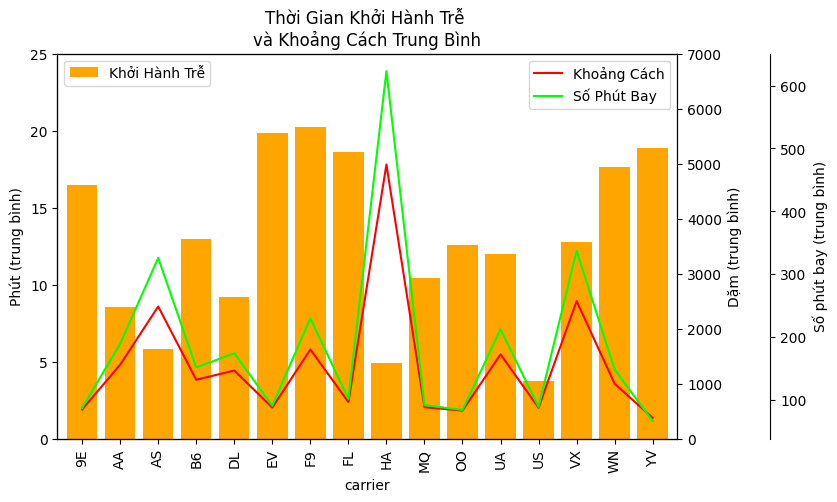

In [24]:
# Trực quan hóa các thông số dep_delay, air_time, distance của các hãng bayTruw

ax1 = carrier_info.plot.bar(y='dep_delay', figsize=(8,5), width=0.8,
                            color='orange', legend=True)
ax1.legend(loc='upper left', labels=['Khởi Hành Trễ'])
ax1.set_ylim([0, 25])
ax1.set_ylabel('Phút (trung bình)')
ax1.set_title('Thời Gian Khởi Hành Trễ \nvà Khoảng Cách Trung Bình')

ax2 = ax1.twinx()
carrier_info.plot.line(ax=ax2, y='distance', color='red', legend=None)
ax2.set_ylim([0, 7000])
ax2.set_ylabel('Dặm (trung bình)')

ax3 = ax1.twinx()
carrier_info.plot.line(ax=ax3, y='air_time', color='lime', legend=None)
ax3.spines['right'].set_position(('axes', 1.15))
ax3.set_ylabel('Số phút bay (trung bình)')

l2_handle, l2_label = ax2.get_legend_handles_labels()
l3_handle, l3_label = ax3.get_legend_handles_labels()
handles = l2_handle+l3_handle
labels = ['Khoảng Cách', 'Số Phút Bay']

ax3.legend(handles=handles, labels=labels)

plt.show()
plt.close('all')

Nhìn vào biểu đồ trên ta có thể thấy hãng HA là hãng hoạt động hiệu quả nhất vì có thời gian trễ thấp nhất trong khi cả quãng
đường bay và thời gian bay đều cao nhất. Xu hướng chung có thể thấy là khi các hãng có quãng thời gian bay và quãng đường bay cao thì thường xuất phát đúng giờ hơn các hãng còn lại.

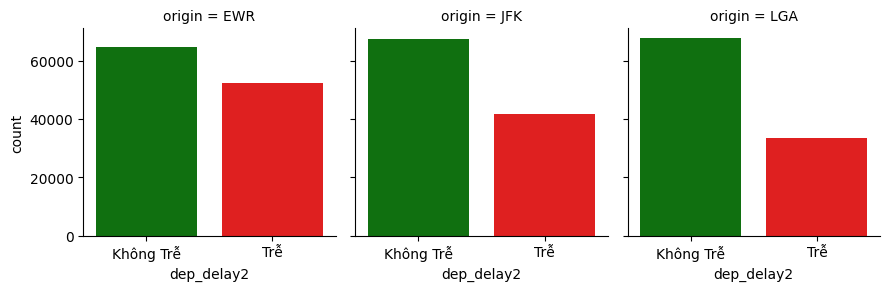

In [25]:
# Chia loại theo 'orign'
bieudo1 = sns.FacetGrid(df1, col='origin')

# Vẽ biểu đồ countplot()
bieudo1.map_dataframe(sns.countplot, 
                      x='dep_delay2', 
                      palette=['g','r'],
                     )

bieudo1.set_xticklabels(['Không Trễ', 'Trễ'])
plt.show()

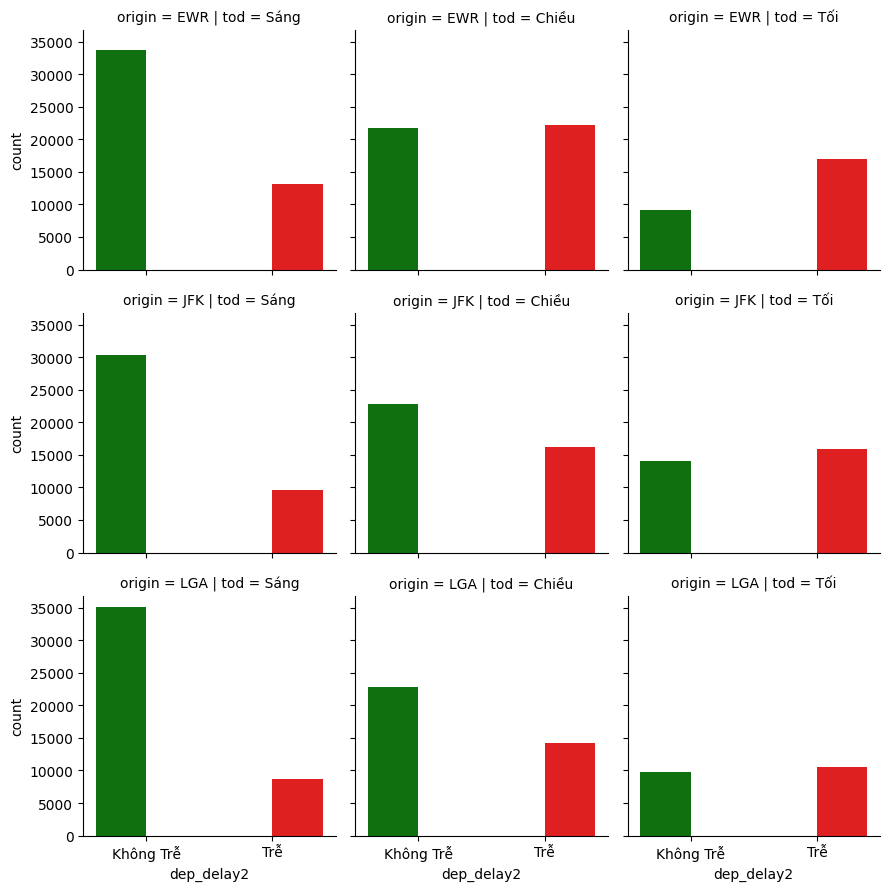

In [26]:
bieudo2 = sns.FacetGrid(df1, col='tod', row='origin')

# Đếm số chuyến bay trễ vs. không-trễ theo các buổi ở mỗi sân bay
bieudo2.map_dataframe(sns.countplot, 
                      x='dep_delay2', 
                      palette=["g", "r"],
                      dodge=True)
bieudo2.set(xticks = [0, 1], xticklabels=['Không Trễ', 'Trễ'])

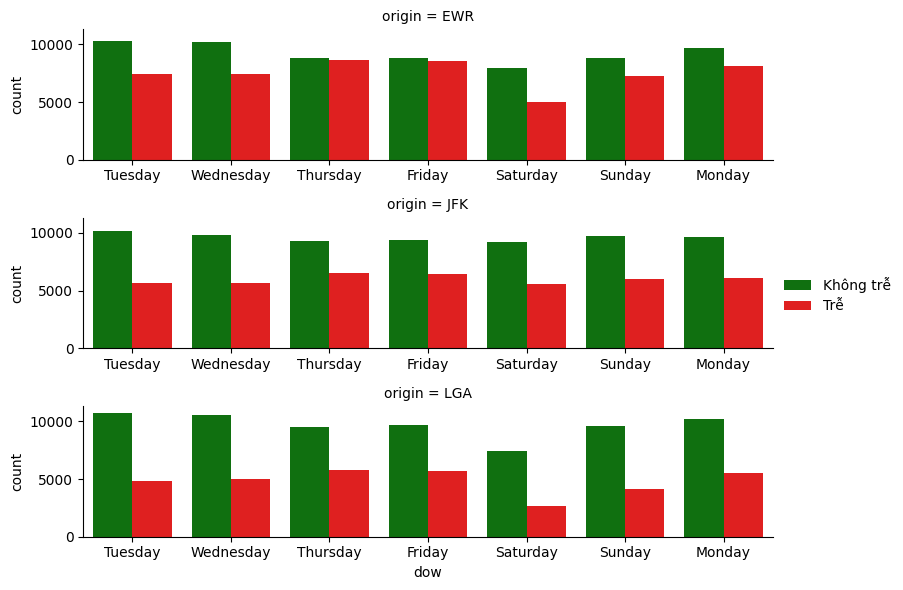

In [27]:
# Chia loại theo cột 'origin'
bieudo3 = sns.FacetGrid(df1, row='origin',
                        sharex=False, sharey=True,
                        height=2, aspect=4, 
                       )

bieudo3.map_dataframe(sns.countplot, x='dow',  
                      hue='dep_delay2', 
                      palette=['g', 'r']
                     )
bieudo3.add_legend(labels = ['Không trễ', 'Trễ'])

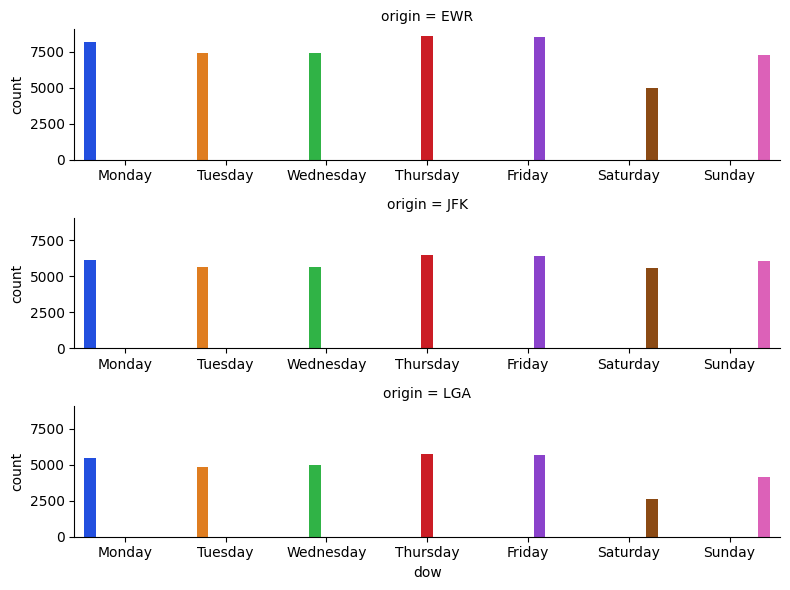

In [28]:
# Chỉ lọc ra các chuyến bay trễ
bieudo4 = sns.FacetGrid(df1[df1['dep_delay2']==True], 
                        row='origin', #hue='dep_delay2',
                        sharex=False, sharey=True,
                        height=2, aspect=4, 
                       )

bieudo4.map_dataframe(sns.countplot, x='dow',
                      order=dow,
                      palette='bright', 
                      dodge=True)

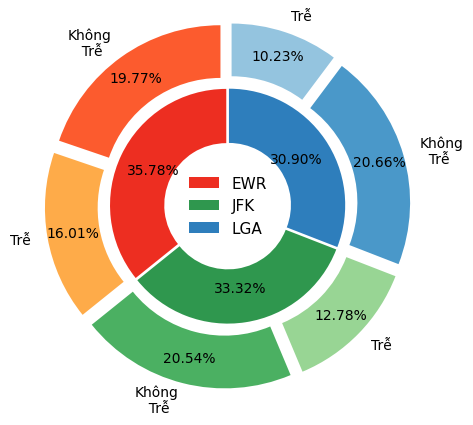

In [29]:
# Trực quan hóa thông tin số chuyên bay và thời gian khởi hành của các sân bay

a, b, c=[plt.cm.YlOrRd, plt.cm.Greens, plt.cm.Blues]

labels = airport_counts.index
explode = [0.01, 0.01, 0.01]
fig, ax = plt.subplots(figsize=(5,5), num=1)

ax.pie(airport_counts, wedgeprops=dict(width=0.35), 
              startangle=90, radius=0.75,
              autopct='%.2f%%', pctdistance=0.70, 
              explode=explode,
              colors=[a(0.7), b(0.7), c(0.7)]
             )
ax.legend(labels, loc="center",fontsize=11, frameon=False)

ax2 = ax.twinx()
color2 = [a(0.6), a(0.4), b(0.6), b(0.4), c(0.6), c(0.4)]
explode2 = [0.08]*6
ax2.pie(airport_delay2.values, wedgeprops=dict(width=0.34), 
               startangle=90, radius=0.35+0.75, colors=color2,
               autopct='%.2f%%', pctdistance=0.85, explode=explode2,
               labels=['Không\n  Trễ  ', 'Trễ']*3
              )

plt.show()
plt.close('all')

Dữ liệu về tổng số chuyến bay và tỉ lệ đúng giờ/trễ giờ giữa các sân bay không có quá nhiều khác biệt. Số chuyến bay đúng giờ đa phần nhỉnh hơn các chuyến bay trễ giờ. Phân bố các chuyến bay trễ giờ đa phần rơi và buổi chiều tối và các ngày trong tuần.

In [30]:
# Giả sử ta khảo sát thêm các thông tin dưới đây của các sân bay
categories = ['Thời Gian Check-in', 'Phòng Chờ', 'Chất Lượng Wifi', 'Nhà Vệ Sinh', 'Các Gian Hàng']
categories = [*categories, categories[0]]

sb1 = [4.3, 4.1, 5.2, 4.2, 3.1]
sb2 = [5.1, 5.4, 4.2, 5.5, 2.1]
sb3 = [3.1, 4.4, 5.2, 3.3, 5.1]

sb1 = [*sb1, sb1[0]]
sb2 = [*sb2, sb2[0]]
sb3 = [*sb3, sb3[0]]

labels = airport_counts.index
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(sb1))
colors = [plt.cm.YlOrRd(0.7), plt.cm.Greens(0.7), plt.cm.Blues(0.7)]


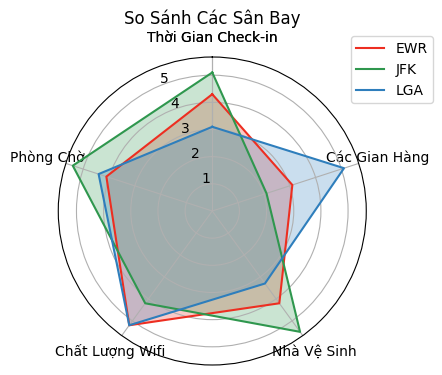

In [31]:
fig, ax = plt.subplots(num=1, figsize=(4, 4), subplot_kw=dict(projection='polar'))

ax.set_theta_offset(np.radians(90))

ax.plot(label_loc, sb1, label=labels[0], color=colors[0])
ax.fill(label_loc, sb1, facecolor=colors[0], alpha=0.25)

ax.plot(label_loc, sb2, label=labels[1], color=colors[1])
ax.fill(label_loc, sb2, facecolor=colors[1], alpha=0.25)

ax.plot(label_loc, sb3, label=labels[2], color=colors[2])
ax.fill(label_loc, sb3, facecolor=colors[2], alpha=0.25)

ax.set_title('So Sánh Các Sân Bay', size=12, y=1.08)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
ax.legend(loc=[0.95, 0.85])
plt.show()
plt.close('all')

In [32]:
# Phân bố chuyến bay của các hãng tại 3 sân bay
gr.T.style.background_gradient(cmap ='Blues', vmin = np.min(gr.to_numpy()), vmax = np.max(gr.to_numpy()))\
        .set_properties(**{'font-size': '10px'})

carrier,9E,AA,AS,B6,DL,EV,F9,FL,HA,MQ,OO,UA,US,VX,WN,YV
EWR,1193,3363,709,6472,4295,41557,0,0,0,2097,6,45501,4326,1552,6056,0
JFK,13742,13600,0,41666,20559,1326,0,0,342,6838,0,4478,2964,3564,0,0
LGA,2359,14984,0,5911,22804,8225,681,3175,0,16102,23,7803,12541,0,5988,544


Kết hợp với các thông tin trên ta có thể thấy các hãng bay có thâm niên và chất lượng cao như AA, HA, VX thường thực hiện các chuyến bay ở sân bay JFK

# TIỀN KIỂM TRA PHÂN BỐ DỮ LIỆU (Phân tích hồi quy ở file tiếp theo)

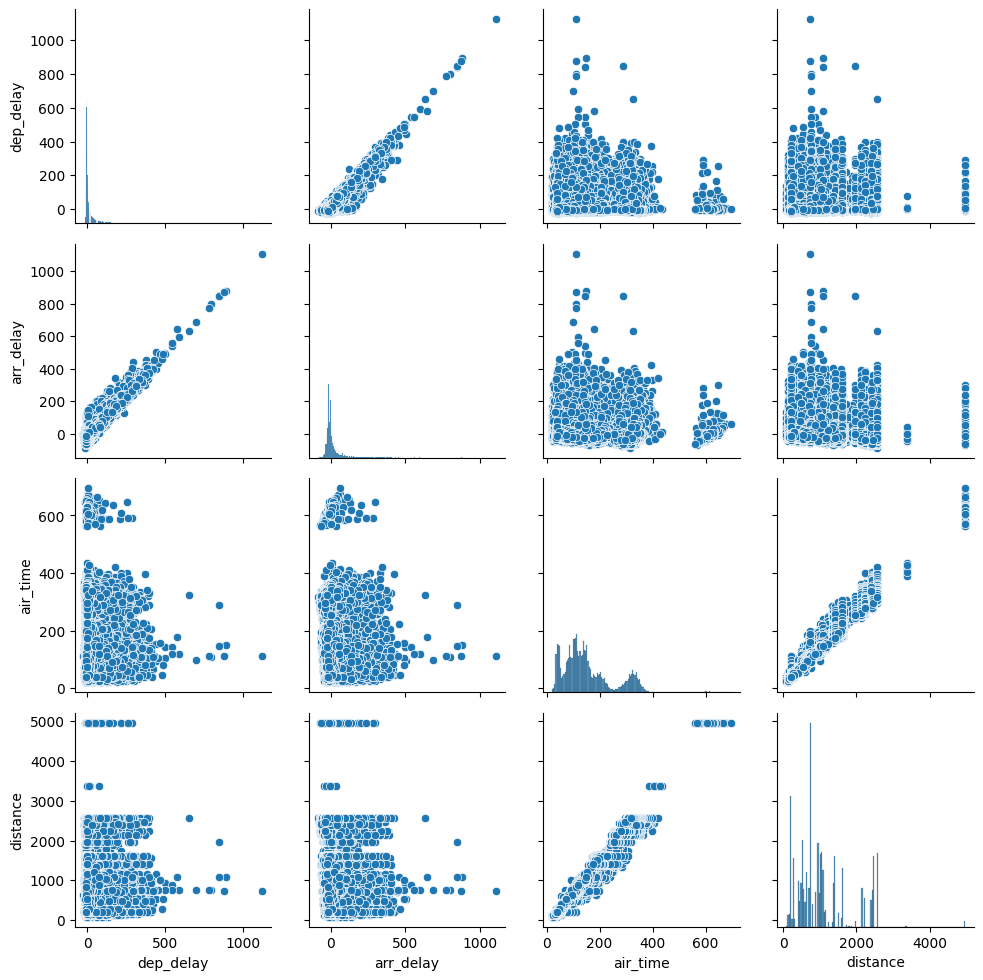

In [33]:
# Kiểm tra sơ lược phân bố dữ liệu của sân bay EWR
dfJFK = df1[df1['origin'] == 'EWR']
grid1 = sns.PairGrid(dfJFK[['dep_delay', 'arr_delay', 'air_time', 'distance']])
grid1.map_offdiag(sns.scatterplot)
grid1.map_diag(sns.histplot)

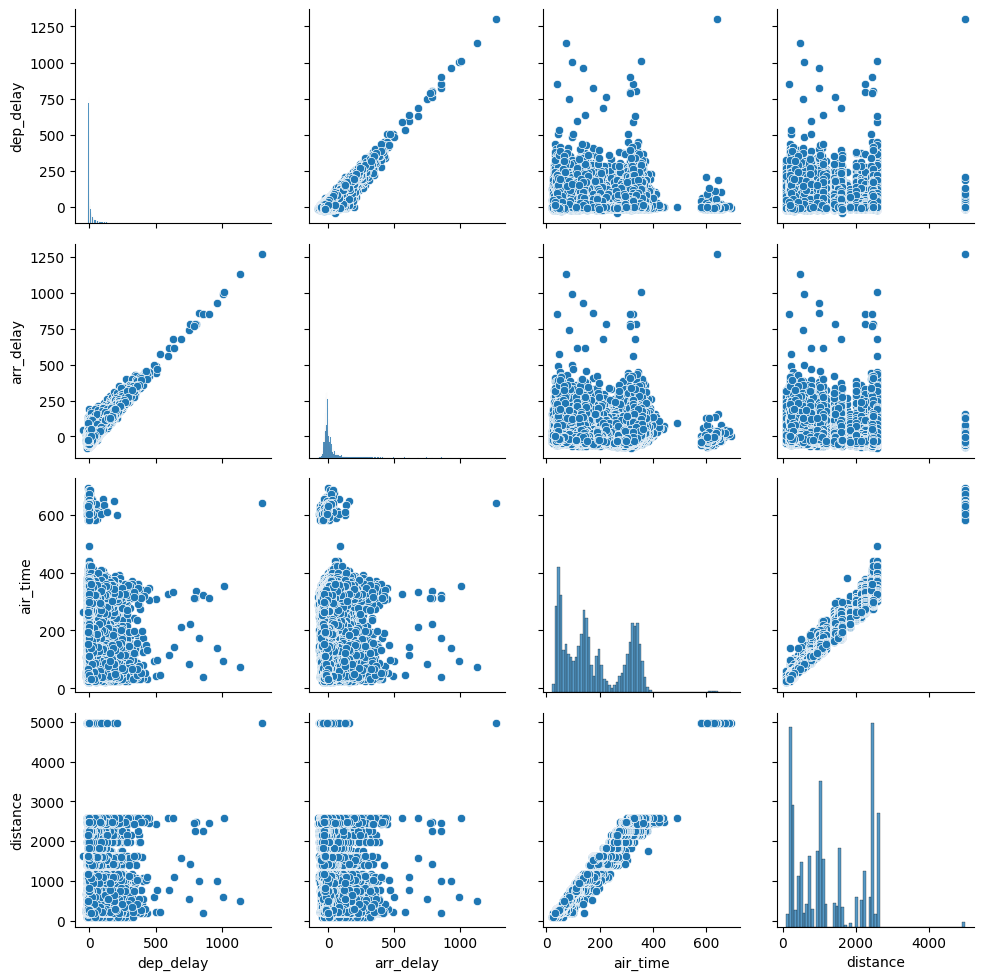

In [34]:
# Kiểm tra sơ lược phân bố dữ liệu của sân bay JFK
dfJFK = df1[df1['origin'] == 'JFK']
grid1 = sns.PairGrid(dfJFK[['dep_delay', 'arr_delay', 'air_time', 'distance']])
grid1.map_offdiag(sns.scatterplot)
grid1.map_diag(sns.histplot)

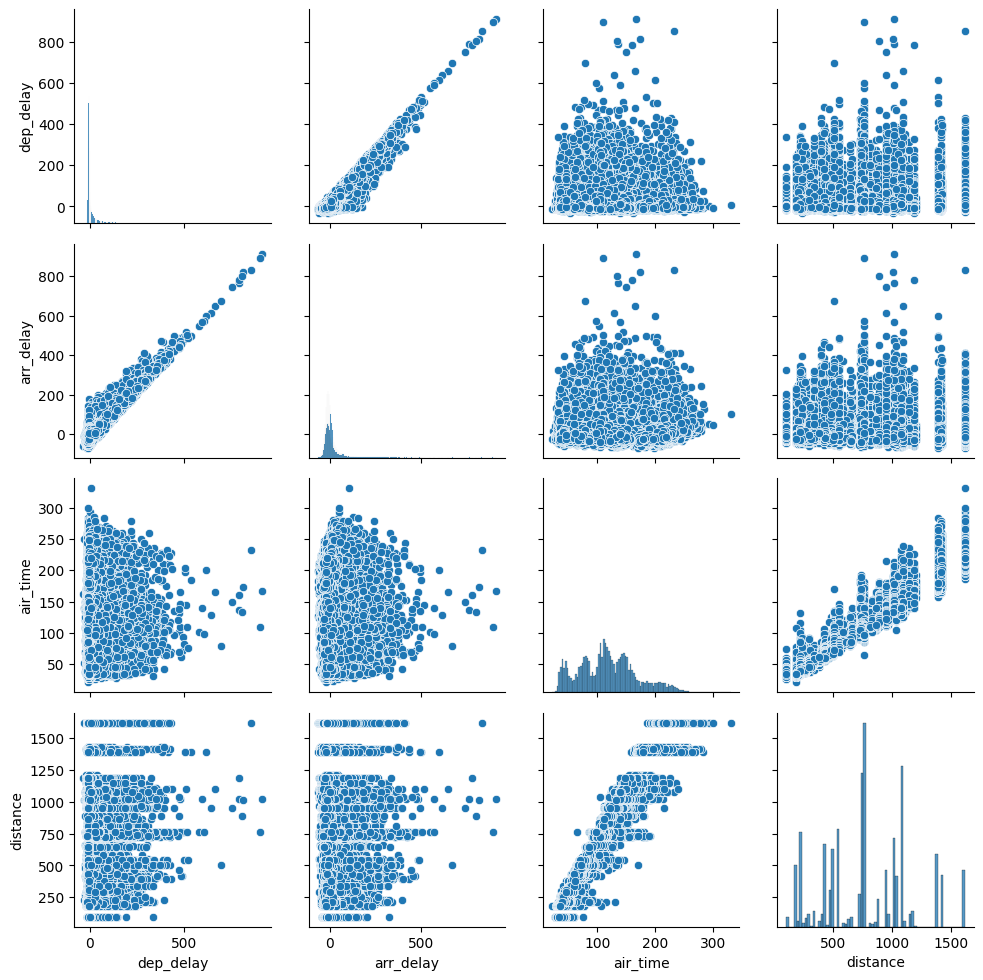

In [35]:
# Kiểm tra sơ lược phân bố dữ liệu của sân bay LGA
dfJFK = df1[df1['origin'] == 'LGA']
grid1 = sns.PairGrid(dfJFK[['dep_delay', 'arr_delay', 'air_time', 'distance']])
grid1.map_offdiag(sns.scatterplot)
grid1.map_diag(sns.histplot)

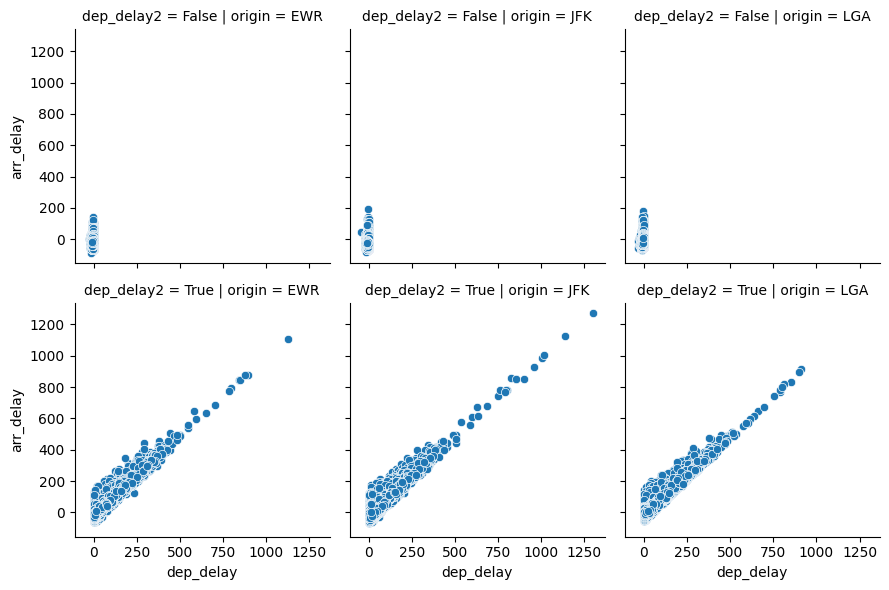

In [36]:
# Chia loại theo cột 'origin' và 'dep_delay2'
bieudo5 = sns.FacetGrid(df1, height=3, 
                        col='origin', row='dep_delay2'
                       )

# Vẽ biểu đồ tương quan giữa 'dep_delay' và 'arr_delay'
bieudo5.map(sns.scatterplot, 'dep_delay', 'arr_delay')

Trong các chuyến bay xuất phát đúng giờ vẫn có các chuyến bay đến nơi trễ. Hầu hết chuyến bay xuất phát trễ đều đến nơi trễ

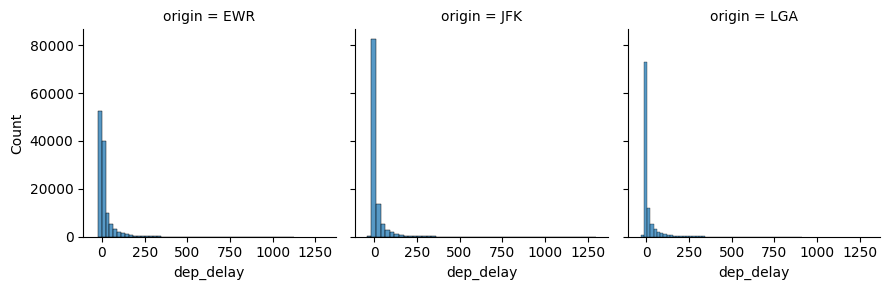

In [37]:
# Chia loại theo cột 'origin'
bieudo6 = sns.FacetGrid(df1, col='origin')

# Vẽ biểu đồ histogram của phân bố 'dep_delay'
bieudo6.map_dataframe(sns.histplot, x='dep_delay', bins=50)

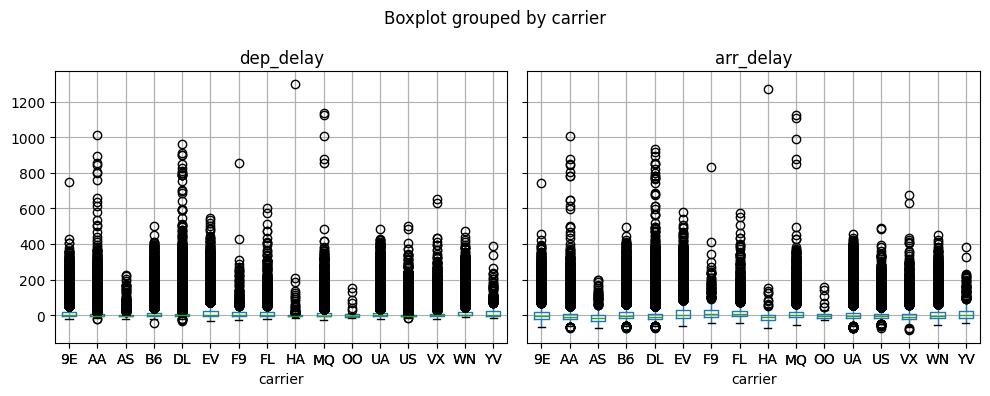

In [38]:
# Kiểm tra phân bố dữ liệu về thời gian khởi hành và thời gian đến nơi của các hãng bay
labels = airport_counts.index
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(sb1))
colors = [plt.cm.YlOrRd(0.7), plt.cm.Greens(0.7), plt.cm.Blues(0.7)]

df.boxplot(column=['dep_delay', 'arr_delay'], by='carrier', figsize=(10,4))
plt.tight_layout()
plt.show()
plt.close('all')

Thông qua 2 biểu đồ trên ta có thể thấy cả dep_delay và arr_delay của các hãng bay đều tồn tại rất nhiều outlier có giá trị vượt xa phân bố của đa số dữ liệu còn lại. Phân bố dữ liệu khởi hành trễ chủ yếu quay quanh mức 0, như vậy trừ những trường hợp đặc
biệt thì thời gian khởi hành trễ mới lớn vượt trội.

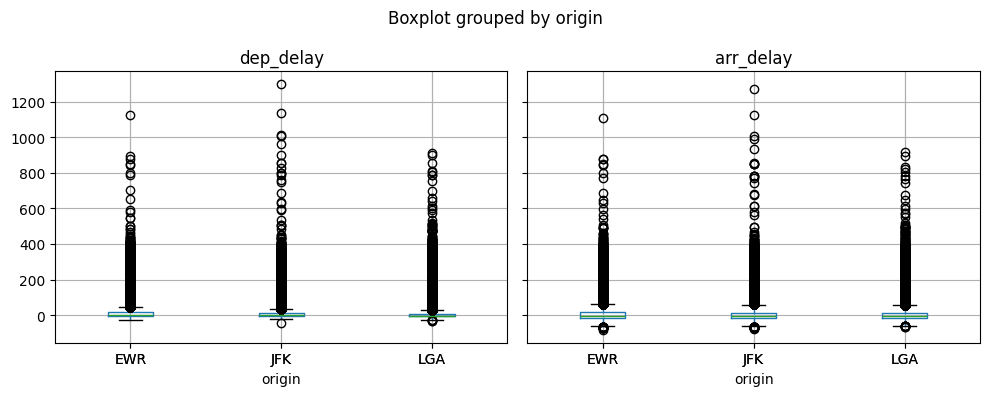

In [39]:
# Kiểm tra phân bố dữ liệu về thời gian khởi hành và thời gian đến nơi của các sân bay
df.boxplot(column=['dep_delay', 'arr_delay'], by='origin', figsize=(10,4))
plt.tight_layout()
plt.show()
plt.close('all')

Phân bố dữ liệu dep_delay và arr_delay của các sân bay cũng tương tự như các hãng bay. Như vậy cần phải có bước loại bỏ outlier
cho các phân tích tiếp theo ở các bước sau (file tiếp theo)